In [47]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.colors import LightSource

%matplotlib widget

plt.rcParams["figure.figsize"] = (15,8)

We will first read the data from the `model.off` file. The first couple of lines explain how the rest of the data is structured.

In [45]:




with open("model.off") as f:
    l1 = f.readline().rstrip()
    if l1 != "OFF":
        print(f"l1 = {l1}")
        raise FileNotFoundError()
    l2 = f.readline().rstrip()
    num_vertices, num_faces, num_edges = [int(x) for x in l2.split(" ")]
    points = []
    for i in range(num_vertices):
        line = f.readline().rstrip()
        point = [float(x) for x in line.split(" ")]
        points.append(np.array(point))
        
    points = np.stack(points, axis=0) #has shape N x 1 x 3

    
    faces = []
    edges = []
    for line in f:
        tokens = line.rstrip().split(" ")
        num_sides = int(tokens[0])
        face_vertices = [int(x) - 1 for x in tokens[1:]]
        for i,j in itertools.combinations(face_vertices, 2):
            edge = np.stack([points[i], points[j]], axis=0)
            edges.append(edge) #I want [shape = 1 x 2 x 3]
        faces.append([points[i] for i in face_vertices])
    edges = np.stack(edges, axis=0)
        
    
    
    

In [29]:
points.shape

(19105, 3)

In [30]:
edges.shape

(78096, 2, 3)

In [48]:
cmap = plt.get_cmap("cool")
colors = [cmap(float(ii)/len(edges)) for ii in range(len(edges))]

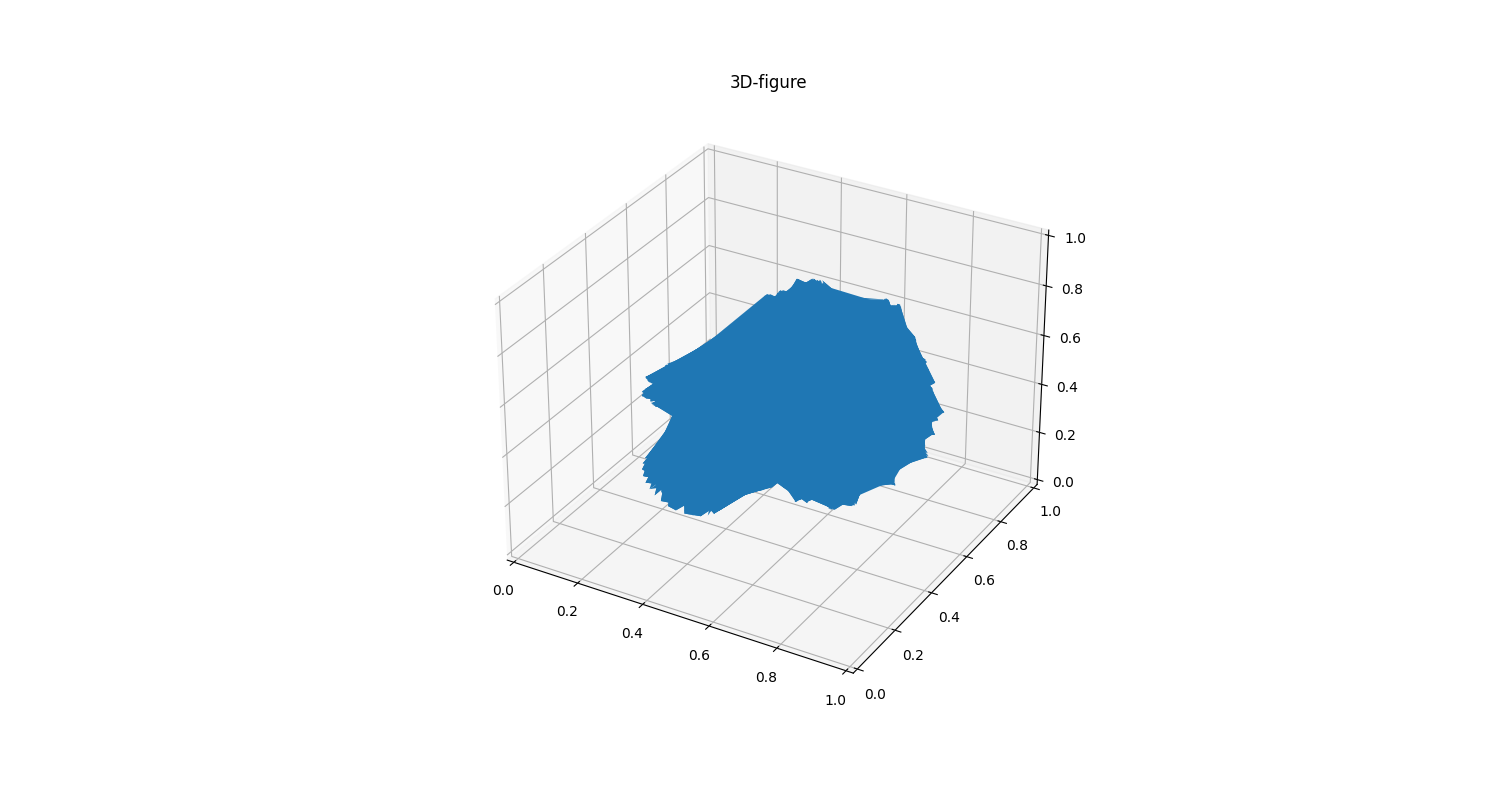

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.add_collection(mplot3d.art3d.Poly3DCollection(faces))



    
plt.title("3D-figure")
plt.show()